# Case 2 - Week 4 - Diabetic retinopathy (part 2)
Cognitive Systems for Health Technology Applications. <br>
Thi, Le Thanh - 1504521 <br>
Helsinki Metropolia University of Applied Sciences.<br>


# Objectives

Using convolutional neural networks to classify diateci retinopathy images. <br>
(This part is run after part 1)


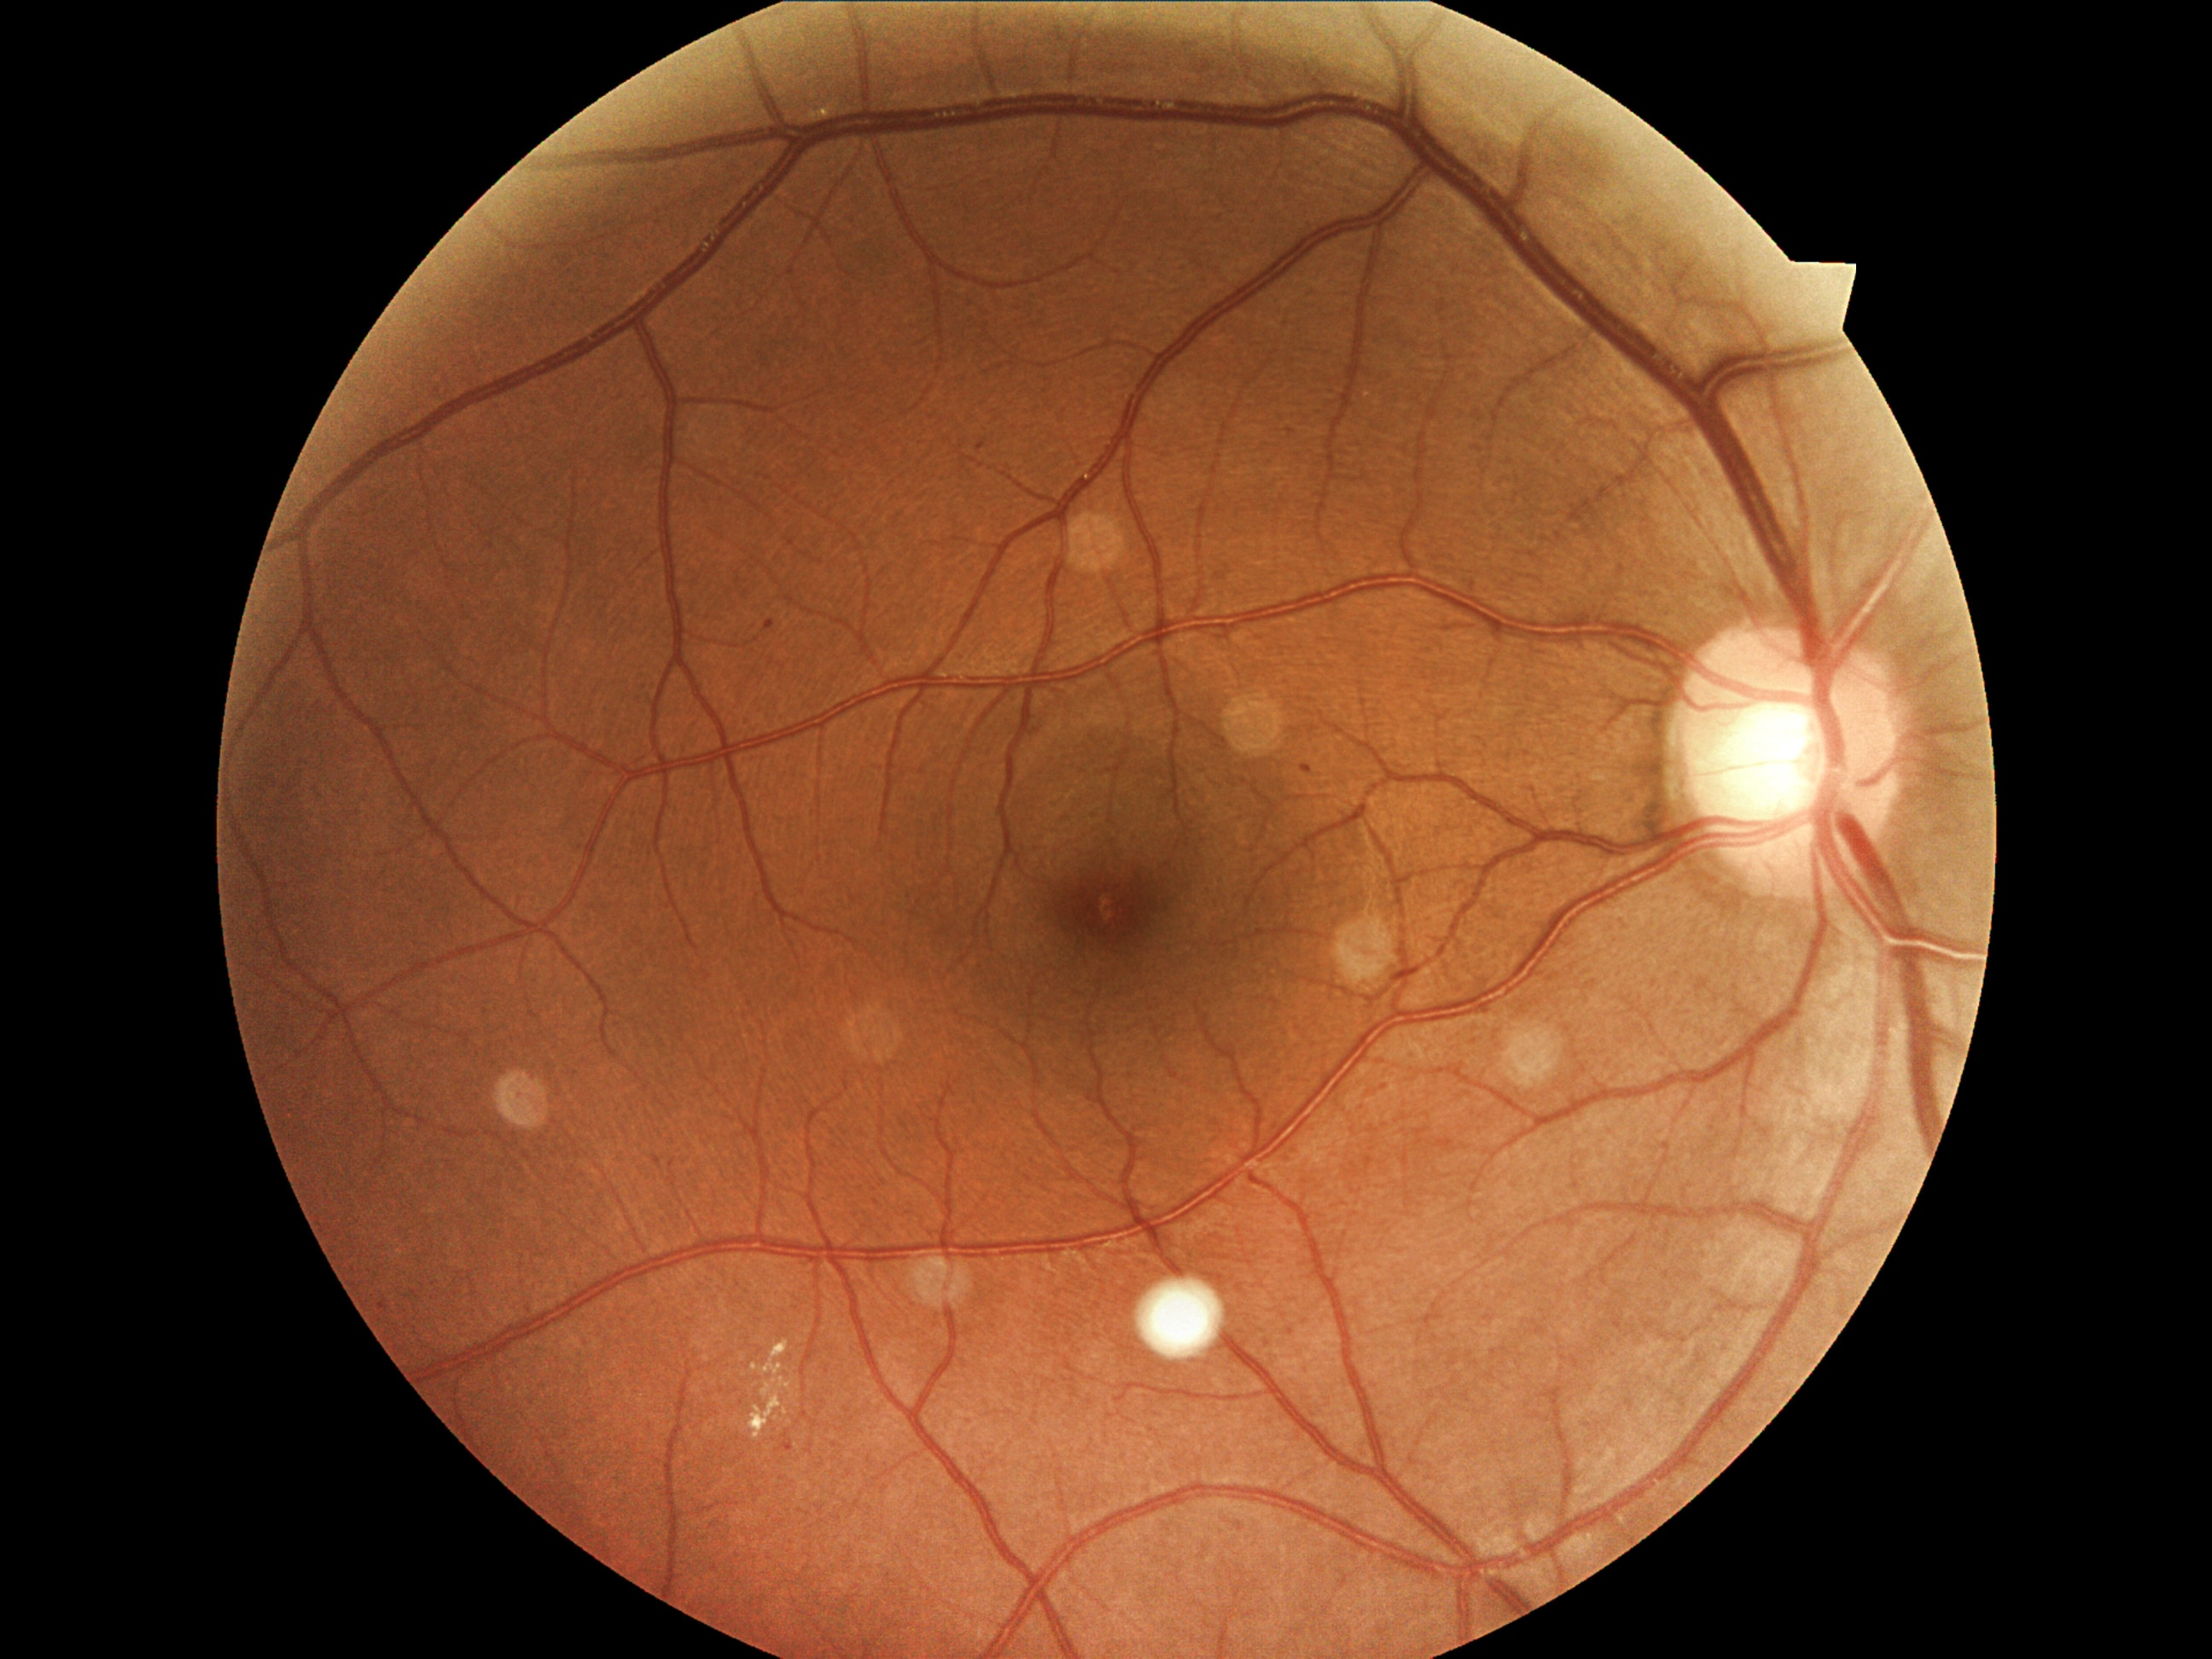

In [18]:
from IPython.display import Image
Image(filename=r'C:\Users\VHQN\Desktop\retinopathy-dataset-master\symptoms\1098_right.jpeg')

# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras import models

%matplotlib inline

Using TensorFlow backend.


# Building network

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
__________

In [3]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Preprocessing data

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = r'C:\Users\VHQN\Desktop\dataset2\train'
validation_dir = r'C:\Users\VHQN\Desktop\dataset2\validation'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

Found 1237 images belonging to 2 classes.
Found 413 images belonging to 2 classes.


In [5]:
# Testing testing testing
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 150, 150, 3)
labels batch shape: (10,)


# Modeling

In [6]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch = 5,
      verbose = 1,
      epochs = 30,
      validation_data = validation_generator,
      validation_steps = 5)

Epoch 1/30
5/5 [==============================] - 66s 13s/step - loss: 0.5013 - acc: 0.8000 - val_loss: 0.6654 - val_acc: 0.7600
Epoch 2/30
5/5 [==============================] - 50s 10s/step - loss: 0.6673 - acc: 0.6400 - val_loss: 0.6786 - val_acc: 0.7600
Epoch 3/30
5/5 [==============================] - 50s 10s/step - loss: 0.6006 - acc: 0.6800 - val_loss: 0.6812 - val_acc: 0.7600
Epoch 4/30
5/5 [==============================] - 52s 10s/step - loss: 0.4529 - acc: 0.8000 - val_loss: 0.6688 - val_acc: 0.7600
Epoch 5/30
5/5 [==============================] - 52s 10s/step - loss: 0.5171 - acc: 0.7800 - val_loss: 0.6688 - val_acc: 0.7600
Epoch 6/30
5/5 [==============================] - 51s 10s/step - loss: 0.6522 - acc: 0.6600 - val_loss: 0.6804 - val_acc: 0.7600
Epoch 7/30
5/5 [==============================] - 50s 10s/step - loss: 0.8139 - acc: 0.4400 - val_loss: 0.6926 - val_acc: 0.6600
Epoch 8/30
5/5 [==============================] - 48s 10s/step - loss: 0.5625 - acc: 0.7400 - val

In [9]:
# First test with very few epoch and small batch sizes
model.save('case_2_run_2.h5')

# Results

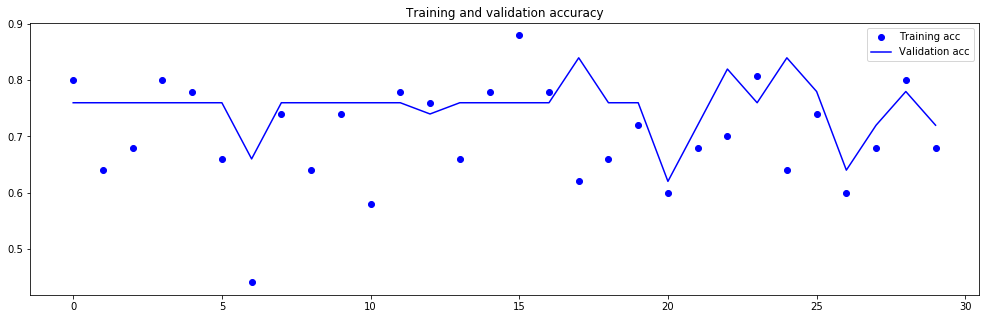

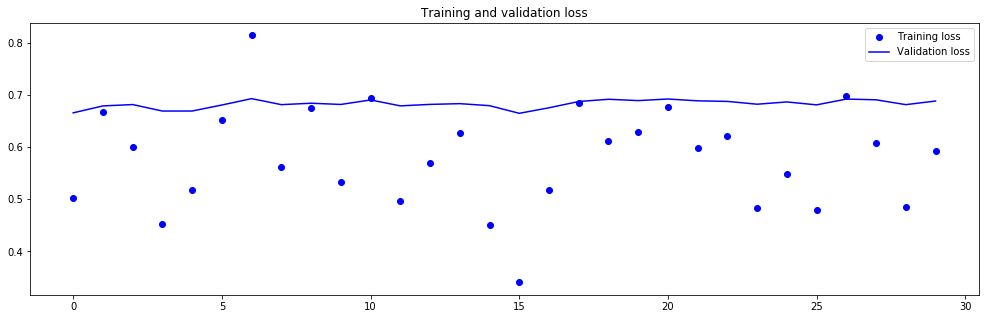

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize = (17, 5))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.figure(figsize = (17, 5))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Conclusion

From epoch 20 validation started to catch up with training.

